In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.tri import TriAnalyzer, Triangulation, UniformTriRefiner

Text(0.5, 1.0, 'A sine wave')

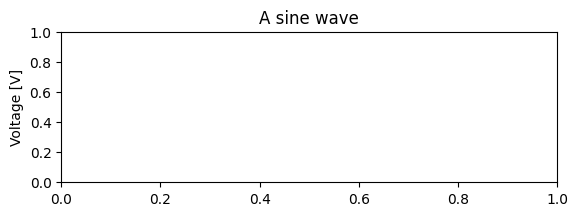

In [35]:
fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Voltage [V]')
ax1.set_title('A sine wave')

In [36]:
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

In [37]:
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('Time [s]')

plt.show()

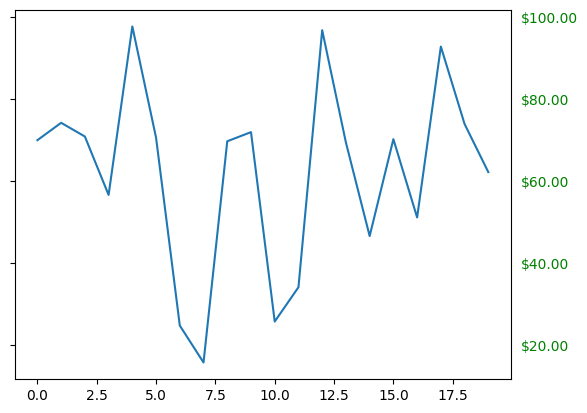

In [38]:
np.random.seed(19680801)

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# Use automatic StrMethodFormatter
ax.yaxis.set_major_formatter('${x:1.2f}')

ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True)

plt.show()

In [39]:
# ----------------------------------------------------------------------------
# Analytical test function
# ----------------------------------------------------------------------------
def experiment_res(x, y):
    """An analytic function representing experiment results."""
    x = 2 * x
    r1 = np.sqrt((0.5 - x)**2 + (0.5 - y)**2)
    theta1 = np.arctan2(0.5 - x, 0.5 - y)
    r2 = np.sqrt((-x - 0.2)**2 + (-y - 0.2)**2)
    theta2 = np.arctan2(-x - 0.2, -y - 0.2)
    z = (4 * (np.exp((r1/10)**2) - 1) * 30 * np.cos(3 * theta1) +
         (np.exp((r2/10)**2) - 1) * 30 * np.cos(5 * theta2) +
         2 * (x**2 + y**2))
    return (np.max(z) - z) / (np.max(z) - np.min(z))

In [40]:
n_test = 200
subdiv = 3
init_mask_frac = 0.0
min_circle_ratio = .01


In [41]:
random_gen = np.random.RandomState(seed=19680801)
x_test = random_gen.uniform(-1., 1., size=n_test)
y_test = random_gen.uniform(-1., 1., size=n_test)
z_test = experiment_res(x_test, y_test)

In [42]:
tri = Triangulation(x_test, y_test)
ntri = tri.triangles.shape[0]

In [43]:
mask_init = np.zeros(ntri, dtype=bool)
masked_tri = random_gen.randint(0, ntri, int(ntri * init_mask_frac))
mask_init[masked_tri] = True
tri.set_mask(mask_init)

In [44]:
mask = TriAnalyzer(tri).get_flat_tri_mask(min_circle_ratio)
tri.set_mask(mask)

# refining the data
refiner = UniformTriRefiner(tri)
tri_refi, z_test_refi = refiner.refine_field(z_test, subdiv=subdiv)

# analytical 'results' for comparison
z_expected = experiment_res(tri_refi.x, tri_refi.y)

# for the demo: loading the 'flat' triangles for plot
flat_tri = Triangulation(x_test, y_test)
flat_tri.set_mask(~mask)


Text(0.5, 1.0, 'Filtering a Delaunay mesh\n(application to high-resolution tricontouring)')

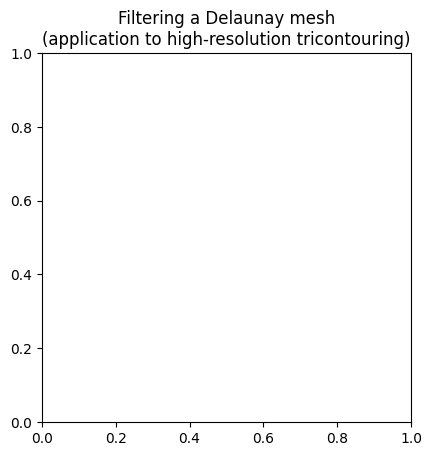

In [ ]:
plot_tri = True          # plot of base triangulation
plot_masked_tri = True   # plot of excessively flat excluded triangles
plot_refi_tri = False    # plot of refined triangulation
plot_expected = False    # plot of analytical function values for comparison


# Graphical options for tricontouring
levels = np.arange(0., 1., 0.025)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_title("Filtering a Delaunay mesh\n"
             "(application to high-resolution tricontouring)")
# 1) plot of the refined (computed) data contours:
ax.tricontour(tri_refi, z_test_refi, levels=levels, cmap='Blues',
              linewidths=[2.0, 0.5, 1.0, 0.5])
# 2) plot of the expected (analytical) data contours (dashed):
if plot_expected:
    ax.tricontour(tri_refi, z_expected, levels=levels, cmap='Blues',
                  linestyles='--')
# 3) plot of the fine mesh on which interpolation was done:
if plot_refi_tri:
    ax.triplot(tri_refi, color='0.97')
# 4) plot of the initial 'coarse' mesh:
if plot_tri:
    ax.triplot(tri, color='0.7')
# 4) plot of the unvalidated triangles from naive Delaunay Triangulation:
if plot_masked_tri:
    ax.triplot(flat_tri, color='red')

plt.show()